# WeatherPy

In [178]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [179]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [180]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao jose do egito
Processing Record 2 of Set 1 | vorgashor
Processing Record 3 of Set 1 | timbuktu


Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | inarajan village
Processing Record 8 of Set 1 | astorga
Processing Record 9 of Set 1 | quellon
Processing Record 10 of Set 1 | thunder bay
Processing Record 11 of Set 1 | eschwege
Processing Record 12 of Set 1 | ambalangoda
Processing Record 13 of Set 1 | chernyshevskiy
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | vilyuchinsk
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | butembo
Processing Record 22 of Set 1 | zeya
Processing Record 23 of Set 1 | saint croix
Processing Record 24 of Set 1 | san antonio de pale
Processing Record 25 of Set 1 | khovd
Processing Record 26 of Set 1 | nosy varika
Processing 

In [234]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [235]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao jose do egito,-7.4789,-37.2744,21.71,91,17,2.66,BR,1712455985
1,vorgashor,67.5833,63.9500,-7.33,91,100,7.92,RU,1712455985
2,timbuktu,16.7735,-3.0074,29.39,11,8,3.87,ML,1712455985
3,bethel,41.3712,-73.4140,6.63,65,0,3.09,US,1712455985
4,margaret river,-33.9500,115.0667,21.52,57,8,6.32,AU,1712455734


In [236]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [237]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao jose do egito,-7.4789,-37.2744,21.71,91,17,2.66,BR,1712455985
1,vorgashor,67.5833,63.9500,-7.33,91,100,7.92,RU,1712455985
2,timbuktu,16.7735,-3.0074,29.39,11,8,3.87,ML,1712455985
3,bethel,41.3712,-73.4140,6.63,65,0,3.09,US,1712455985
4,margaret river,-33.9500,115.0667,21.52,57,8,6.32,AU,1712455734


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [238]:
# Look for the date
dates_pd = pd.DataFrame(city_data_df["Date"])
for i, row in dates_pd.iterrows():
    year,month,day,*_ = time.gmtime(row["Date"])
    dates_pd.loc[i,"Date2"] = (f"{year}-{month}-{day}")
dates_pd["Date2"].unique()
date = dates_pd["Date2"].unique()
date

array(['2024-4-7'], dtype=object)

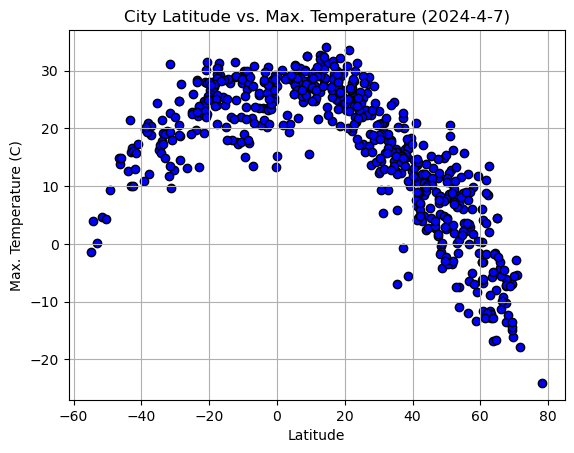

In [239]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,color="b",edgecolors="black")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max. Temperature ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

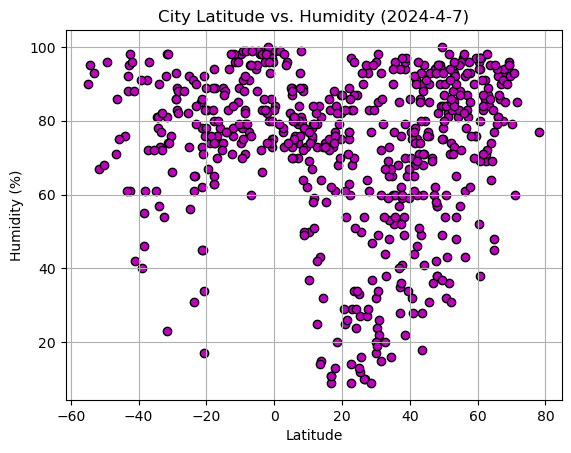

In [240]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,color="m", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

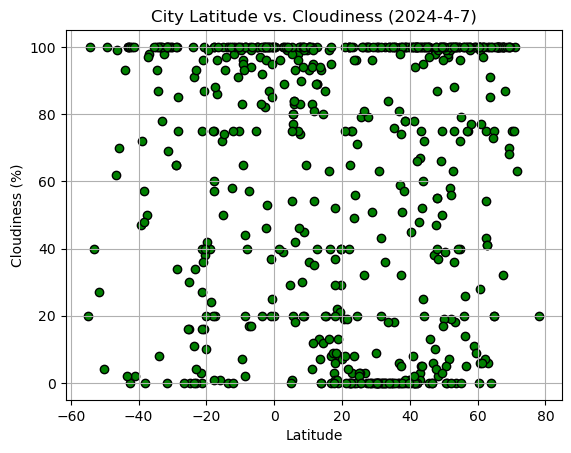

In [241]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,color="g",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

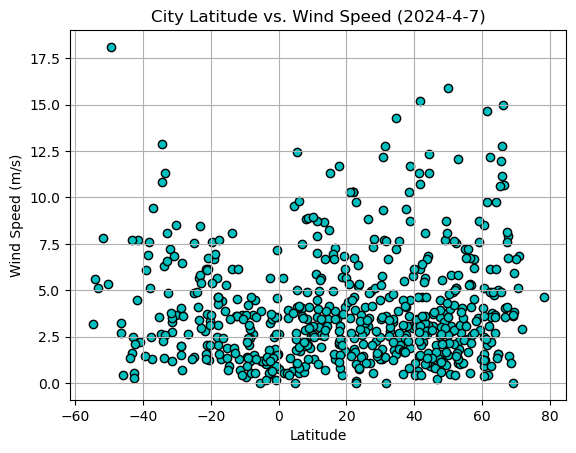

In [242]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,color="c",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date[0]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [373]:
# Define a function to create Linear Regression plots
def linear_reg_plots(x_values, y_values, y_label, color, fig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    regress_values = x_values * slope + intercept
    plt.scatter(x_values,y_values,color=color,edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"City Latitude vs. {(y_values).name}")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=10,color="r",
                 bbox=dict(boxstyle="square,pad=0.2", fc="white", lw=0.5))
    print(f"The r-value is: {rvalue}")
    plt.savefig(f"output_data/Fig{fig}.png")
    plt.show()

In [305]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vorgashor,67.5833,63.9500,-7.33,91,100,7.92,RU,1712455985
2,timbuktu,16.7735,-3.0074,29.39,11,8,3.87,ML,1712455985
3,bethel,41.3712,-73.4140,6.63,65,0,3.09,US,1712455985
5,albany,42.6001,-73.9662,5.25,71,48,2.18,US,1712455985
6,inarajan village,13.2736,144.7484,30.55,84,13,8.70,GU,1712455985


In [256]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao jose do egito,-7.4789,-37.2744,21.71,91,17,2.66,BR,1712455985
4,margaret river,-33.9500,115.0667,21.52,57,8,6.32,AU,1712455734
7,astorga,-23.2325,-51.6656,22.17,65,34,8.47,BR,1712455985
8,quellon,-43.1167,-73.6167,9.95,88,100,1.59,CL,1712455985
13,avarua,-21.2078,-159.7750,28.03,78,75,1.54,CK,1712455985


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8919584517360005


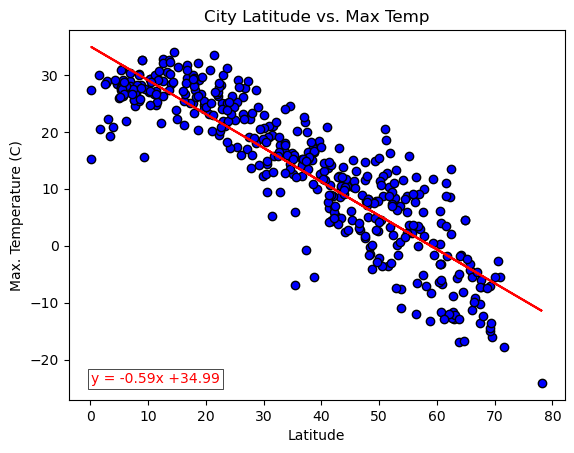

In [372]:
# Linear regression on Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Max Temp"],
         "y_label": "Max. Temperature (C)",
         "color": "b",
         "fig": 5
}
linear_reg_plots(**param)

The r-value is: 0.6653595643278182


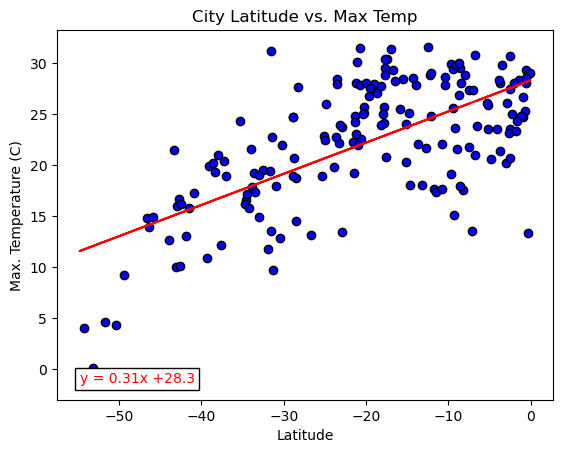

In [353]:
# Linear regression on Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Max Temp"],
         "y_label": "Max. Temperature (C)",
         "color": "b",
         "fig": 6
}
linear_reg_plots(**param)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19833883406682837


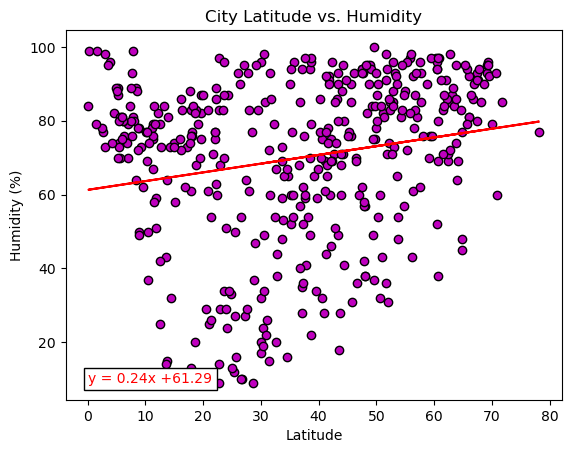

In [354]:
# Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Humidity"],
         "y_label": "Humidity (%)",
         "color": "m",
         "fig": 7
}
linear_reg_plots(**param)

The r-value is: 0.2135282989435954


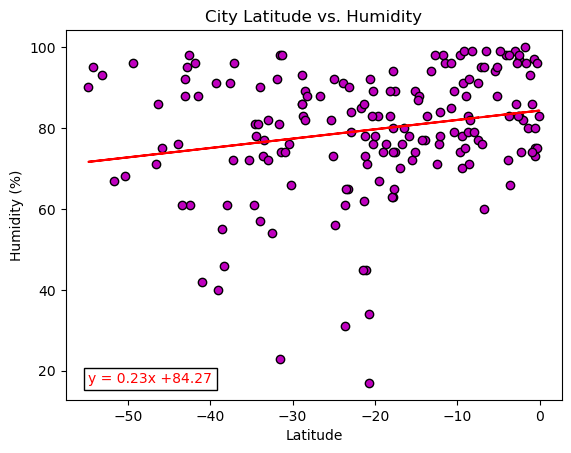

In [355]:
# Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Humidity"],
         "y_label": "Humidity (%)",
         "color": "m",
         "fig": 8
}
linear_reg_plots(**param)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.124607847749147


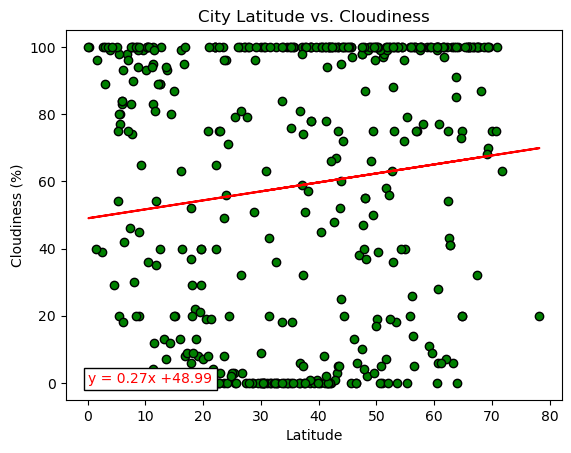

In [356]:
# Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Cloudiness"],
         "y_label": "Cloudiness (%)",
         "color": "g",
         "fig": 9
}
linear_reg_plots(**param)

The r-value is: 0.10759026172608821


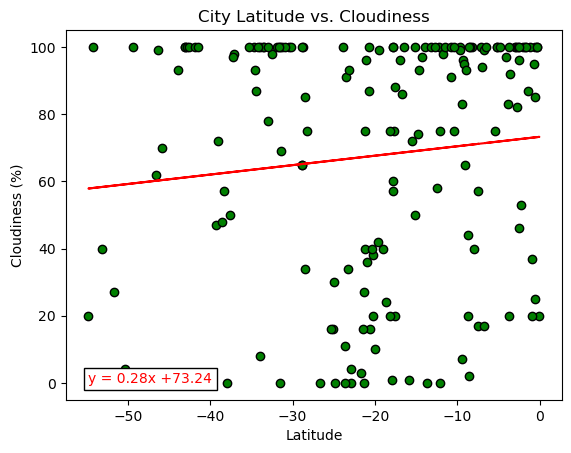

In [357]:
# Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Cloudiness"],
         "y_label": "Cloudiness (%)",
         "color": "g",
         "fig": 10
}
linear_reg_plots(**param)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09712231624148858


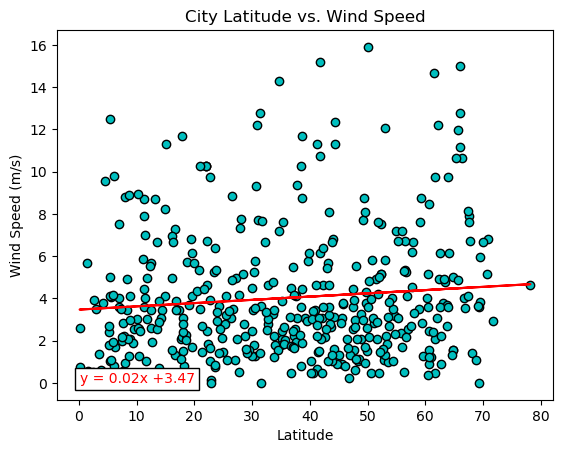

In [358]:
# Northern Hemisphere
param = {"x_values": northern_hemi_df["Lat"],
         "y_values": northern_hemi_df["Wind Speed"],
         "y_label": "Wind Speed (m/s)",
         "color": "c",
         "fig": 11
}
linear_reg_plots(**param)

The r-value is: -0.36198886161559585


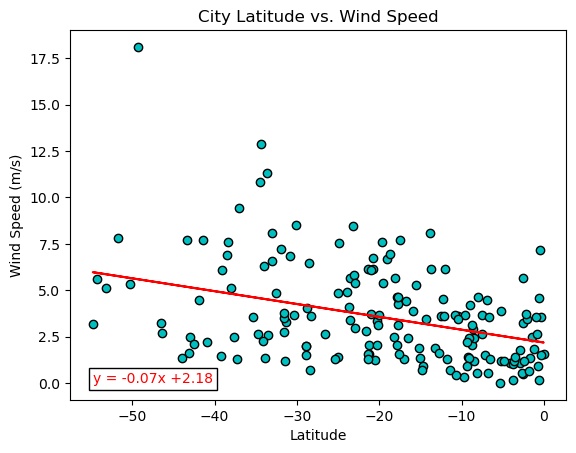

In [359]:
# Southern Hemisphere
param = {"x_values": southern_hemi_df["Lat"],
         "y_values": southern_hemi_df["Wind Speed"],
         "y_label": "Wind Speed (m/s)",
         "color": "c",
         "fig": 12
}
linear_reg_plots(**param)

**Discussion about the linear relationship:** YOUR RESPONSE HERE